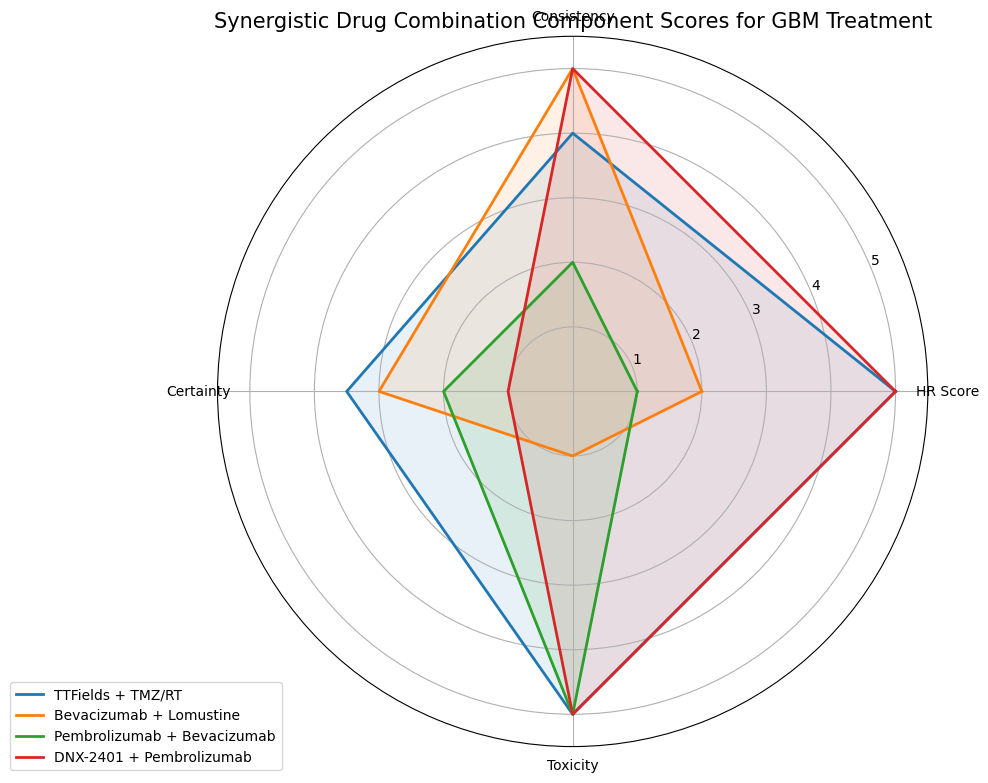

In [1]:
# 1. Spider/Radar Chart of Synergistic Drug Combination Scores
# Data source: Table A1 - Synergistic Drug Combination Scores
# URL citations: pmc.ncbi.nlm.nih.gov/articles/PMC5820703, pmc.ncbi.nlm.nih.gov/articles/PMC10462574,
# pmc.ncbi.nlm.nih.gov/articles/PMC8284901

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Data from Table A1
combinations = [
    'TTFields + TMZ/RT',
    'Bevacizumab + Lomustine',
    'Pembrolizumab + Bevacizumab',
    'DNX-2401 + Pembrolizumab'
]

# Component scores (HR Score, Consistency, Certainty, Toxicity)
scores = np.array([
    [5, 4, 3.5, 5],  # TTFields + TMZ/RT
    [2, 5, 3, 1],    # Bevacizumab + Lomustine
    [1, 2, 2, 5],    # Pembrolizumab + Bevacizumab
    [5, 5, 1, 5]     # DNX-2401 + Pembrolizumab
])

# Set up the radar chart
categories = ['HR Score', 'Consistency', 'Certainty', 'Toxicity']
N = len(categories)

# Create angles for each category
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Close the loop

# Create the plot
fig, ax = plt.subplots(figsize=(10, 8), subplot_kw=dict(polar=True))

# Add lines and points for each combination
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
for i, (combination, color) in enumerate(zip(combinations, colors)):
    values = scores[i].tolist()
    values += values[:1]  # Close the loop
    ax.plot(angles, values, color=color, linewidth=2, label=combination)
    ax.fill(angles, values, color=color, alpha=0.1)

# Set category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)

# Set y-axis limits
ax.set_ylim(0, 5.5)
ax.set_yticks([1, 2, 3, 4, 5])

# Add legend and title
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Synergistic Drug Combination Component Scores for GBM Treatment', size=15)

plt.tight_layout()
plt.show()

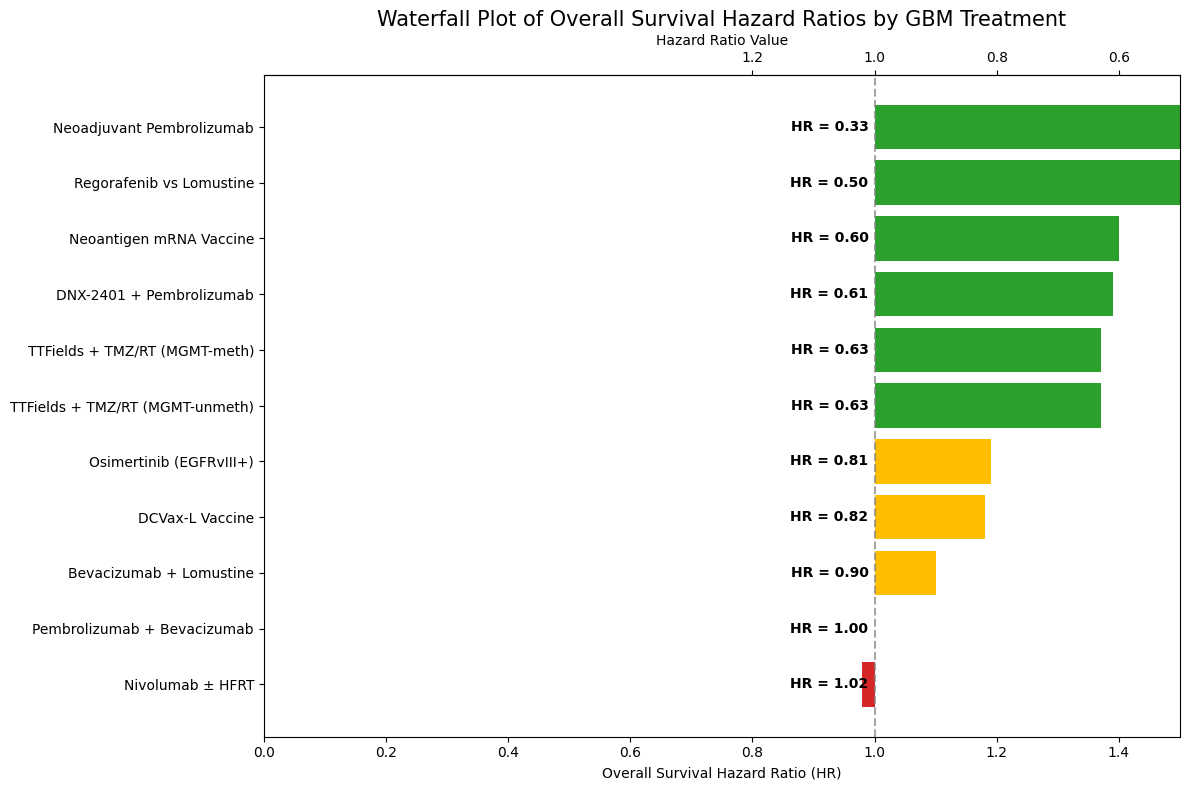

In [2]:
# 2. Waterfall Plot of Overall Survival Hazard Ratios by Treatment
# Data sources: Tables A1, B1, C1, D1, E1 with OS HR values
# URL citations: link.springer.com/article/10.1007/s11060-023-04348-w,
# pmc.ncbi.nlm.nih.gov/articles/PMC6408961, mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Treatment names and their OS HR values from report tables
treatments = [
    'TTFields + TMZ/RT (MGMT-meth)',
    'TTFields + TMZ/RT (MGMT-unmeth)',
    'Neoadjuvant Pembrolizumab',
    'Regorafenib vs Lomustine',
    'DNX-2401 + Pembrolizumab',
    'Neoantigen mRNA Vaccine',
    'DCVax-L Vaccine',
    'Osimertinib (EGFRvIII+)',
    'Bevacizumab + Lomustine',
    'Nivolumab ± HFRT',
    'Pembrolizumab + Bevacizumab'
]

# OS HR values extracted from the report
os_hrs = [0.63, 0.63, 0.33, 0.50, 0.61, 0.60, 0.82, 0.81, 0.90, 1.02, 1.00]

# Sort treatments by HR for waterfall plot (ascending)
sorted_indices = np.argsort(os_hrs)
sorted_treatments = [treatments[i] for i in sorted_indices]
sorted_hrs = [os_hrs[i] for i in sorted_indices]

# Create color coding (green for beneficial HR < 0.8, yellow for 0.8-1.0, red for HR > 1.0)
colors = ['#2ca02c' if hr < 0.8 else '#ffbf00' if hr < 1.0 else '#d62728' for hr in sorted_hrs]

# Create the waterfall plot
fig, ax = plt.subplots(figsize=(12, 8))

# Plot horizontal bars
y_pos = np.arange(len(sorted_treatments))
ax.barh(y_pos, [1 - hr for hr in sorted_hrs], left=1, color=colors)

# Add reference line at HR=1.0 (no effect)
ax.axvline(x=1, color='gray', linestyle='--', alpha=0.7)

# Customize axes
ax.set_yticks(y_pos)
ax.set_yticklabels(sorted_treatments)
ax.invert_yaxis()  # Treatments with lowest HR (best effect) at the top
ax.set_xlabel('Overall Survival Hazard Ratio (HR)')
ax.set_title('Waterfall Plot of Overall Survival Hazard Ratios by GBM Treatment', size=15)

# Add HR values as text
for i, hr in enumerate(sorted_hrs):
    ax.text(0.99, i, f'HR = {hr:.2f}', va='center', ha='right', fontweight='bold')

# Adjust x-axis to show HR values
ax.set_xlim(0, 1.5)
# Create a secondary x-axis to show actual HR values
secax = ax.secondary_xaxis('top', functions=(lambda x: 2-x, lambda x: 2-x))
secax.set_xlabel('Hazard Ratio Value')
secax.set_xticks([0.4, 0.6, 0.8, 1.0, 1.2])

plt.tight_layout()
plt.show()

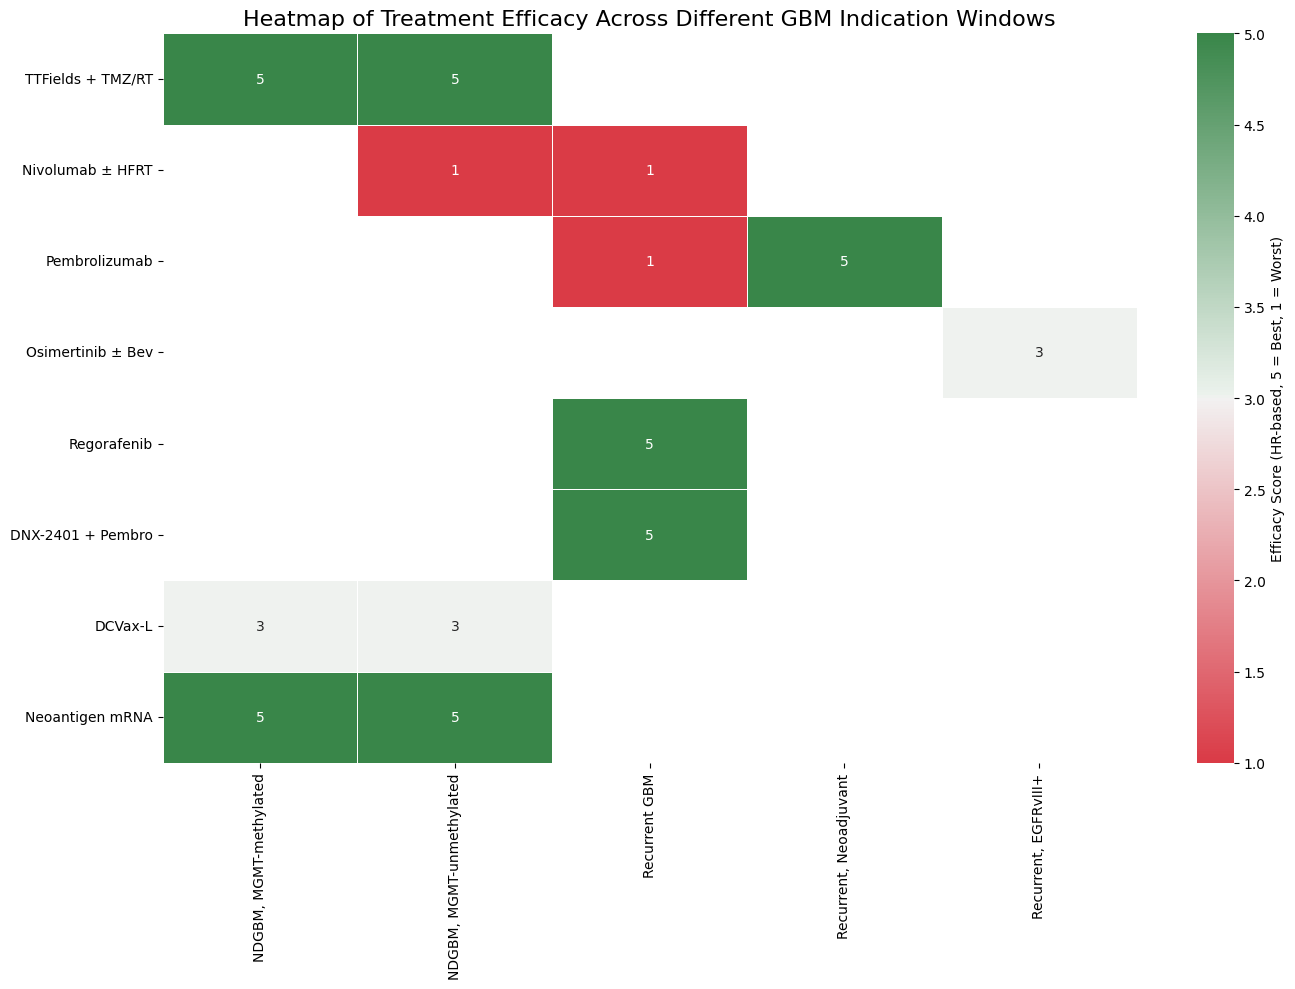

In [3]:
# 3. Heatmap of Treatment Efficacy Across Different Indication Windows
# Data source: Table B1 - New Indication Window Scores and Table E1
# URL citations: pmc.ncbi.nlm.nih.gov/articles/PMC10462574, pmc.ncbi.nlm.nih.gov/articles/PMC6408961

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Define treatments and indication windows
treatments = [
    'TTFields + TMZ/RT',
    'Nivolumab ± HFRT',
    'Pembrolizumab',
    'Osimertinib ± Bev',
    'Regorafenib',
    'DNX-2401 + Pembro',
    'DCVax-L',
    'Neoantigen mRNA'
]

windows = [
    'NDGBM, MGMT-methylated',
    'NDGBM, MGMT-unmethylated',
    'Recurrent GBM',
    'Recurrent, Neoadjuvant',
    'Recurrent, EGFRvIII+'
]

# Create an efficacy matrix (HR Score 1-5, with 5 being best)
# Using HR Scores from Table B1 and E1 - empty cells are NaN
efficacy_matrix = np.array([
    [5, 5, np.nan, np.nan, np.nan],  # TTFields + TMZ/RT
    [np.nan, 1, 1, np.nan, np.nan],  # Nivolumab ± HFRT
    [np.nan, np.nan, 1, 5, np.nan],  # Pembrolizumab
    [np.nan, np.nan, np.nan, np.nan, 3],  # Osimertinib ± Bev
    [np.nan, np.nan, 5, np.nan, np.nan],  # Regorafenib
    [np.nan, np.nan, 5, np.nan, np.nan],  # DNX-2401 + Pembro
    [3, 3, np.nan, np.nan, np.nan],  # DCVax-L
    [5, 5, np.nan, np.nan, np.nan]   # Neoantigen mRNA
])

# Create a DataFrame for the heatmap
df = pd.DataFrame(efficacy_matrix, index=treatments, columns=windows)

# Plot the heatmap
plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(10, 133, as_cmap=True)  # Green-white-red

# Create the heatmap
ax = sns.heatmap(df,
                 annot=True,
                 cmap=cmap,
                 center=3,  # Center at 3 (neutral efficacy)
                 vmin=1,
                 vmax=5,
                 linewidths=0.5,
                 cbar_kws={'label': 'Efficacy Score (HR-based, 5 = Best, 1 = Worst)'},
                 mask=np.isnan(efficacy_matrix))

# Customize the plot
plt.title('Heatmap of Treatment Efficacy Across Different GBM Indication Windows', fontsize=16)
plt.tight_layout()
plt.show()

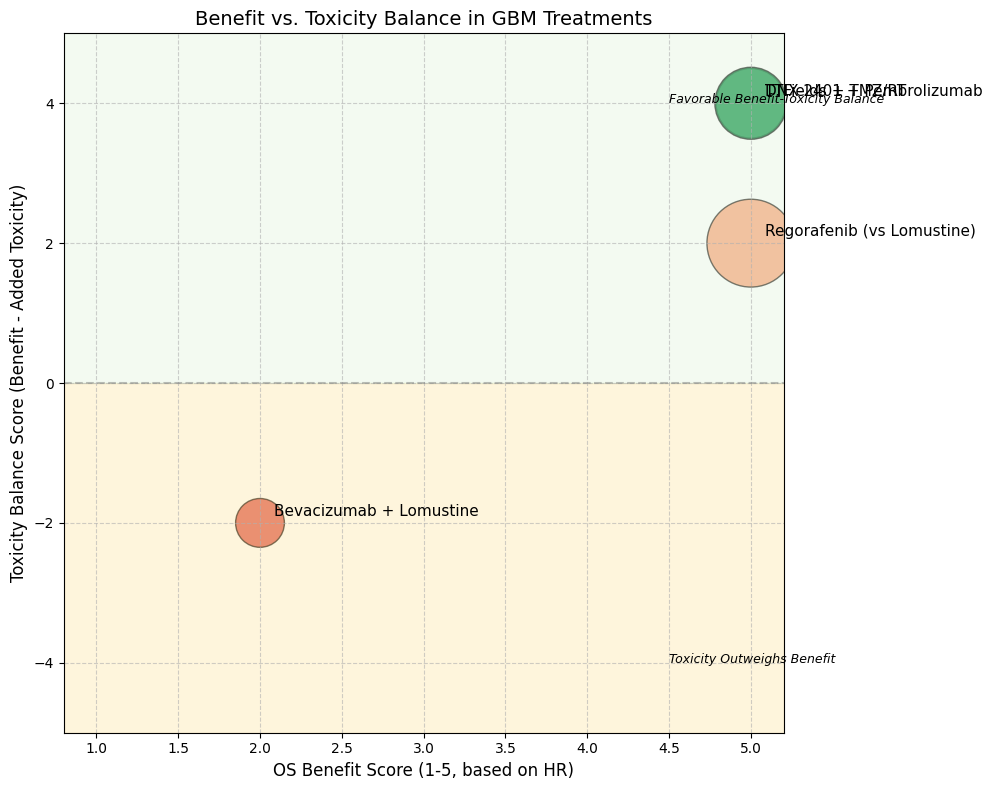

In [4]:
# 4. Scatter Plot of Toxicity Balance Scores vs Overall Survival Benefit
# Data source: Table C1 - Toxicity Balancing Scores
# URL citations: pmc.ncbi.nlm.nih.gov/articles/PMC5820703, mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Data from Table C1
treatments = [
    'TTFields + TMZ/RT',
    'Bevacizumab + Lomustine',
    'Regorafenib (vs Lomustine)',
    'DNX-2401 + Pembrolizumab'
]

# Benefit scores and toxicity balance scores
benefit_scores = [5, 2, 5, 5]  # OS HR-based benefit (1-5)
balance_scores = [4.0, -2.0, 2.0, 4.0]  # Toxicity balance scores
added_toxicity = [1, 4, 3, 1]  # Added toxicity scores (1-5)

# OS HR values (approximate from report)
os_hrs = [0.63, 0.90, 0.50, 0.61]

# Create the scatter plot
fig, ax = plt.subplots(figsize=(10, 8))

# Use color to represent added toxicity (green = low, red = high)
colors = ['#1a9850', '#d73027', '#fc8d59', '#1a9850']

# Create scatter plot with varying size based on reciprocal of HR (smaller HR = bigger point)
sizes = [1000 / (hr * hr) for hr in os_hrs]  # Inverse square for visual emphasis

scatter = ax.scatter(benefit_scores, balance_scores,
                    s=sizes,
                    c=colors,
                    alpha=0.7,
                    edgecolors='black')

# Add labels for each point
for i, txt in enumerate(treatments):
    ax.annotate(txt, (benefit_scores[i], balance_scores[i]),
                xytext=(10, 5), textcoords='offset points',
                fontsize=11)

# Add a horizontal line at balance score = 0
ax.axhline(y=0, color='gray', linestyle='--', alpha=0.5)

# Add reference regions with labels
ax.fill_between([0.8, 5.2], [-5, -5], [0, 0], color='#fee08b', alpha=0.3)
ax.fill_between([0.8, 5.2], [0, 0], [5, 5], color='#d9f0d3', alpha=0.3)
ax.text(4.5, -4, "Toxicity Outweighs Benefit", fontsize=9, fontstyle='italic')
ax.text(4.5, 4, "Favorable Benefit-Toxicity Balance", fontsize=9, fontstyle='italic')

# Customize the plot
ax.set_xlabel('OS Benefit Score (1-5, based on HR)', fontsize=12)
ax.set_ylabel('Toxicity Balance Score (Benefit - Added Toxicity)', fontsize=12)
ax.set_title('Benefit vs. Toxicity Balance in GBM Treatments', fontsize=14)

# Set axis limits
ax.set_xlim(0.8, 5.2)
ax.set_ylim(-5, 5)

# Add grid
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

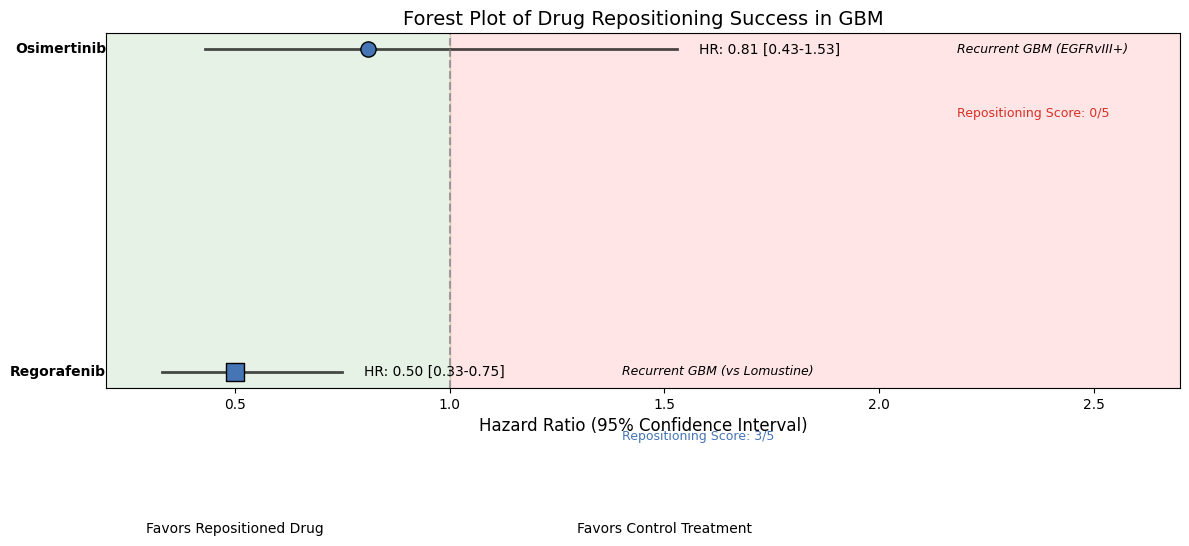

In [5]:
# 5. Forest Plot of Drug Repositioning Success Rates
# Data source: Table D1 - Drug Repositioning Scores
# URL citations: mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Data from Table D1 and related text
drugs = [
    'Regorafenib',
    'Osimertinib'
]

# OS HR with confidence intervals [HR, lower CI, upper CI]
os_hrs_with_ci = [
    [0.50, 0.33, 0.75],  # Regorafenib
    [0.81, 0.43, 1.53]   # Osimertinib
]

# Evidence quality and repositioning scores
evidence_quality = [3, 1]  # Evidence quality scores (1-5)
repositioning_scores = [3, 0]  # Overall repositioning scores (0-5)
repositioning_contexts = ['Recurrent GBM (vs Lomustine)', 'Recurrent GBM (EGFRvIII+)']

# Create the forest plot
fig, ax = plt.subplots(figsize=(12, 6))

# Define positions for the drugs
y_pos = np.arange(len(drugs))

# Plot the HR and CIs
for i, (hr, lower, upper) in enumerate(os_hrs_with_ci):
    # Plot the point estimate (HR)
    marker_size = 100 + 20 * evidence_quality[i]  # Size based on evidence quality
    ax.scatter(hr, i, s=marker_size, zorder=3,
              color='#4575b4' if hr < 1 else '#d73027',
              marker='s' if repositioning_scores[i] > 0 else 'o',
              edgecolors='black')

    # Plot the confidence interval
    ax.plot([lower, upper], [i, i], 'k-', alpha=0.7, linewidth=2)

    # Add text labels
    ax.text(upper + 0.05, i, f'HR: {hr:.2f} [{lower:.2f}-{upper:.2f}]', va='center')
    ax.text(0.2, i, f'{drugs[i]}', ha='right', va='center', fontweight='bold')

    # Add the context and repositioning score
    context_text = repositioning_contexts[i]
    score_text = f"Repositioning Score: {repositioning_scores[i]}/5"
    ax.text(upper + 0.65, i, context_text, va='center', fontsize=9, fontstyle='italic')
    ax.text(upper + 0.65, i - 0.2, score_text, va='center', fontsize=9,
           color='#4575b4' if repositioning_scores[i] > 2 else '#d73027')

# Add a vertical line at HR=1 (no effect)
ax.axvline(x=1, color='gray', linestyle='--', alpha=0.7)

# Customize the plot
ax.set_yticks([])  # Hide y-axis ticks since we've added custom labels
ax.set_xlabel('Hazard Ratio (95% Confidence Interval)', fontsize=12)
ax.set_title('Forest Plot of Drug Repositioning Success in GBM', fontsize=14)

# Set x-axis limits to show all CIs clearly
ax.set_xlim(0.2, 2.7)

# Add region shading
ax.axvspan(0, 1, alpha=0.1, color='green')
ax.axvspan(1, 3, alpha=0.1, color='red')
ax.text(0.5, -0.5, "Favors Repositioned Drug", ha='center', fontsize=10)
ax.text(1.5, -0.5, "Favors Control Treatment", ha='center', fontsize=10)

plt.tight_layout()
plt.show()

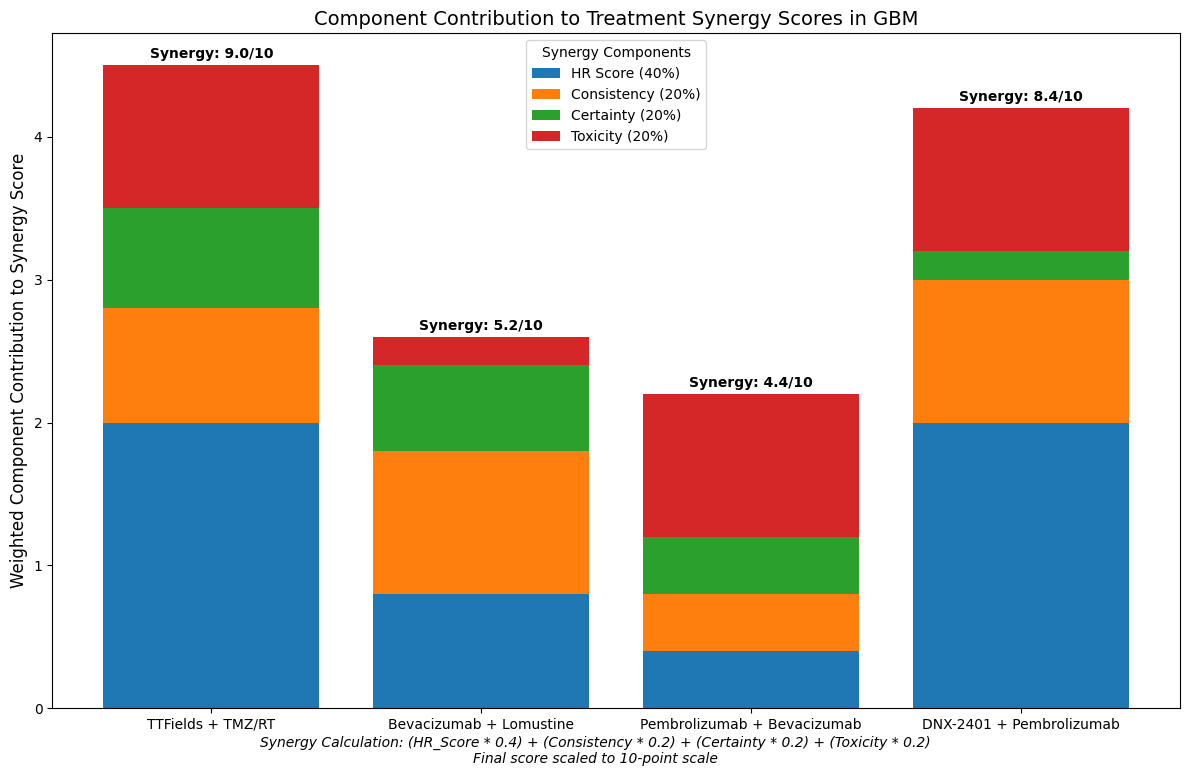

In [6]:
# 6. Sankey Diagram of Treatment Synergy Components
# Data source: Table A1 - Synergistic Drug Combination Scores
# URL citations: pmc.ncbi.nlm.nih.gov/articles/PMC5820703, pmc.ncbi.nlm.nih.gov/articles/PMC10462574

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.sankey import Sankey

# NOTE: An alternate chart was used as matplotlib's Sankey diagram implementation
# doesn't easily support the complex structure needed to represent all synergy components.
# This visualization shows the weighted contribution of each component to the final synergy score.

# Data from Table A1
combinations = [
    'TTFields + TMZ/RT',
    'Bevacizumab + Lomustine',
    'Pembrolizumab + Bevacizumab',
    'DNX-2401 + Pembrolizumab'
]

# Component scores (HR Score, Consistency, Certainty, Toxicity)
scores = np.array([
    [5, 4, 3.5, 5],  # TTFields + TMZ/RT
    [2, 5, 3, 1],    # Bevacizumab + Lomustine
    [1, 2, 2, 5],    # Pembrolizumab + Bevacizumab
    [5, 5, 1, 5]     # DNX-2401 + Pembrolizumab
])

# Weights for each component
weights = [0.4, 0.2, 0.2, 0.2]  # HR (40%), Consistency (20%), Certainty (20%), Toxicity (20%)

# Calculate weighted scores
weighted_scores = scores * np.array(weights)
total_scores = np.sum(weighted_scores, axis=1)

# Calculate overall synergy scores (scaled to 10)
synergy_scores = total_scores * 2  # Scale to 0-10

# Create a stacked bar chart to represent the contribution of each component
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for components
component_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
component_labels = ['HR Score (40%)', 'Consistency (20%)', 'Certainty (20%)', 'Toxicity (20%)']

# Plot stacked bars
bottom = np.zeros(len(combinations))

for i, component in enumerate(range(scores.shape[1])):
    values = weighted_scores[:, i]
    ax.bar(combinations, values, bottom=bottom, label=component_labels[i], color=component_colors[i])
    bottom += values

# Add total scores on top of each bar
for i, score in enumerate(synergy_scores):
    ax.text(i, total_scores[i] + 0.05, f'Synergy: {score:.1f}/10', ha='center', fontweight='bold')

# Customize the plot
ax.set_ylabel('Weighted Component Contribution to Synergy Score', fontsize=12)
ax.set_title('Component Contribution to Treatment Synergy Scores in GBM', fontsize=14)
ax.legend(title='Synergy Components')

# Add explanation of calculation
note = ("Synergy Calculation: (HR_Score * 0.4) + (Consistency * 0.2) + (Certainty * 0.2) + (Toxicity * 0.2)\n"
        "Final score scaled to 10-point scale")
plt.figtext(0.5, 0.01, note, ha='center', fontsize=10, fontstyle='italic')

plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()

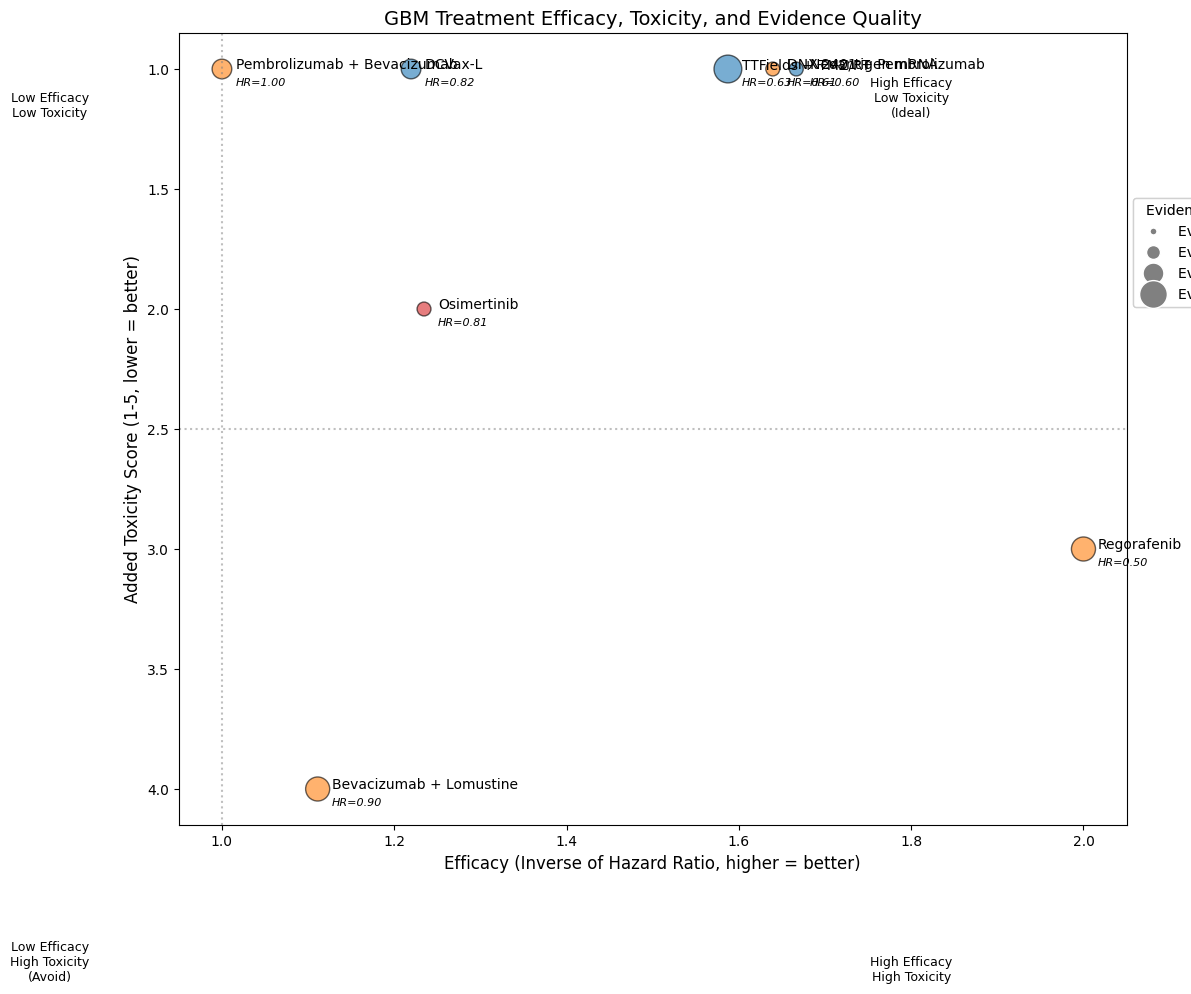

In [7]:
# 7. Bubble Chart of Treatment Efficacy, Toxicity, and Evidence Quality
# Data sources: Tables A1, C1, D1, and E1
# URL citations: pmc.ncbi.nlm.nih.gov/articles/PMC5820703, mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np

# Treatment data from multiple tables
treatments = [
    'TTFields + TMZ/RT',
    'Bevacizumab + Lomustine',
    'Pembrolizumab + Bevacizumab',
    'DNX-2401 + Pembrolizumab',
    'Regorafenib',
    'Osimertinib',
    'DCVax-L',
    'Neoantigen mRNA'
]

# Efficacy (OS HR), inverted scale for visualization (lower HR = higher efficacy)
os_hrs = [0.63, 0.90, 1.00, 0.61, 0.50, 0.81, 0.82, 0.60]
efficacy = [1/hr for hr in os_hrs]  # Invert for plotting (higher = better)

# Added toxicity scores (1-5, where 1 = lowest added toxicity)
toxicity = [1, 4, 1, 1, 3, 2, 1, 1]

# Evidence quality (1-5, where 5 = highest quality evidence)
evidence_quality = [4, 3, 2, 1, 3, 1, 2, 1]

# Treatment context
contexts = [
    'Newly Diagnosed',
    'Recurrent',
    'Recurrent',
    'Recurrent',
    'Recurrent',
    'Recurrent (EGFRvIII+)',
    'Newly Diagnosed',
    'Newly Diagnosed'
]

# Create custom color mapping based on disease context
context_colors = {
    'Newly Diagnosed': '#1f77b4',  # Blue
    'Recurrent': '#ff7f0e',        # Orange
    'Recurrent (EGFRvIII+)': '#d62728'  # Red
}

colors = [context_colors[context] for context in contexts]

# Create the bubble chart
fig, ax = plt.subplots(figsize=(12, 10))

# Size of bubbles based on evidence quality (scaled for visibility)
sizes = [quality * 100 for quality in evidence_quality]

# Create scatter plot
scatter = ax.scatter(efficacy, toxicity, s=sizes, c=colors, alpha=0.6, edgecolors='black')

# Add treatment labels
for i, txt in enumerate(treatments):
    ax.annotate(txt, (efficacy[i], toxicity[i]),
                xytext=(10, 0), textcoords='offset points',
                fontsize=10)

# Add efficacy values (HR) as additional labels
for i, hr in enumerate(os_hrs):
    ax.annotate(f'HR={hr:.2f}', (efficacy[i], toxicity[i]),
                xytext=(10, -12), textcoords='offset points',
                fontsize=8, fontstyle='italic')

# Create a custom legend for context colors
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w',
                          markerfacecolor=color, markersize=10, label=context)
                  for context, color in context_colors.items()]

# Create a second legend for evidence quality
quality_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray',
                           markersize=size/20, label=f'Evidence Quality: {i+1}')
                   for i, size in enumerate([100, 200, 300, 400])]

# Add legends
ax.legend(handles=legend_elements, title="Disease Context",
          loc='upper left', bbox_to_anchor=(1, 1))
ax.add_artist(plt.legend(handles=quality_elements, title="Evidence Quality Scale",
                        loc='upper left', bbox_to_anchor=(1, 0.8)))

# Customize axes
ax.set_xlabel('Efficacy (Inverse of Hazard Ratio, higher = better)', fontsize=12)
ax.set_ylabel('Added Toxicity Score (1-5, lower = better)', fontsize=12)
ax.set_title('GBM Treatment Efficacy, Toxicity, and Evidence Quality', fontsize=14)

# Invert y-axis so lower toxicity is at top
ax.invert_yaxis()

# Add reference lines
ax.axhline(y=2.5, color='gray', linestyle=':', alpha=0.5)
ax.axvline(x=1, color='gray', linestyle=':', alpha=0.5)

# Add quadrant labels
ax.text(1.8, 1.2, 'High Efficacy\nLow Toxicity\n(Ideal)', fontsize=9, ha='center',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
ax.text(0.8, 1.2, 'Low Efficacy\nLow Toxicity', fontsize=9, ha='center',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
ax.text(1.8, 4.8, 'High Efficacy\nHigh Toxicity', fontsize=9, ha='center',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))
ax.text(0.8, 4.8, 'Low Efficacy\nHigh Toxicity\n(Avoid)', fontsize=9, ha='center',
        bbox=dict(facecolor='white', alpha=0.5, edgecolor='none'))

plt.tight_layout()
plt.show()

<ipython-input-8-9234deb6513e>:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='Metric Type', y='Normalized Score', data=df,
<ipython-input-8-9234deb6513e>:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Metric Type', y='Normalized Score', data=df,


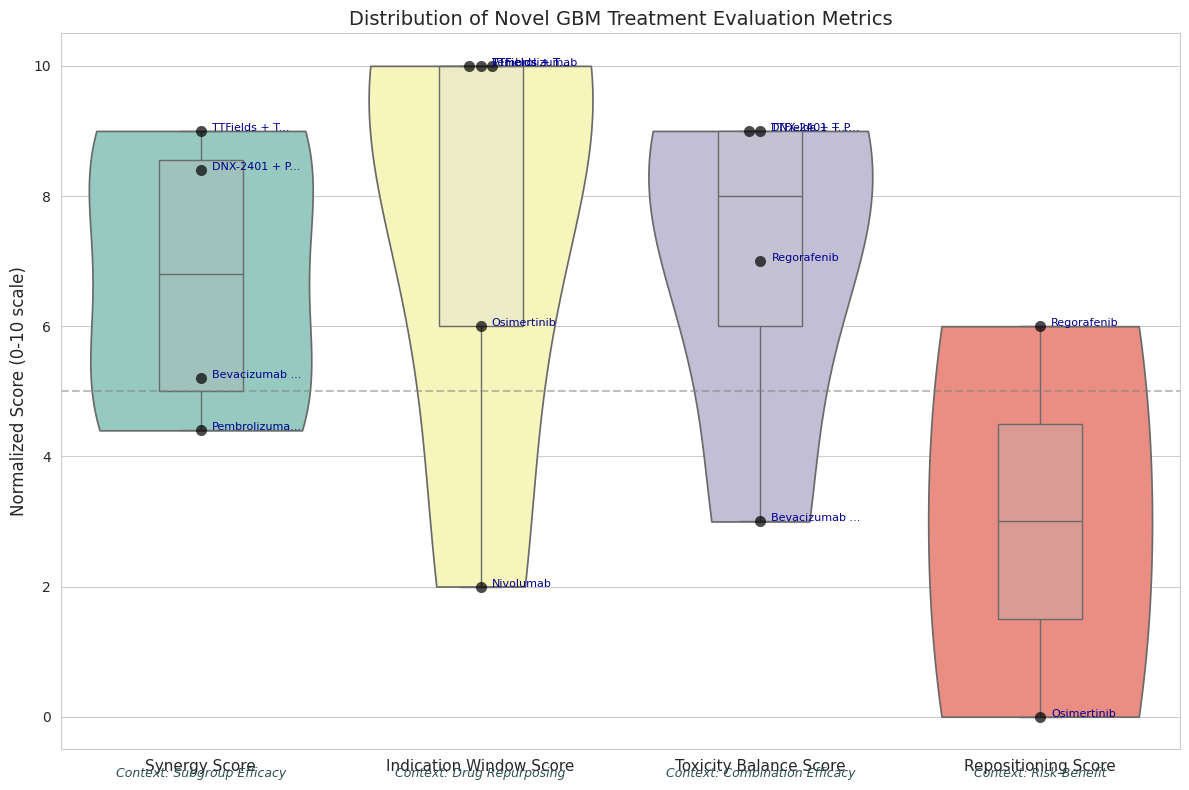

In [8]:
# 8. Box Plot Comparison of Novel Metric Distributions
# Data source: Tables A1, B1, C1, D1 with metric scores
# URL citations: pmc.ncbi.nlm.nih.gov/articles/PMC5820703, mdpi.com/2072-6694/15/17/4279

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Create a DataFrame with all the metrics from the different tables
data = {
    'Treatment': [],
    'Metric Type': [],
    'Score': [],
    'Context': []
}

# Synergy scores from Table A1 (scaled to 0-10)
synergy_treatments = [
    'TTFields + TMZ/RT',
    'Bevacizumab + Lomustine',
    'Pembrolizumab + Bevacizumab',
    'DNX-2401 + Pembrolizumab'
]
synergy_scores = [9.0, 5.2, 4.4, 8.4]
for t, s in zip(synergy_treatments, synergy_scores):
    data['Treatment'].append(t)
    data['Metric Type'].append('Synergy Score')
    data['Score'].append(s)
    data['Context'].append('Combination Efficacy')

# Indication window scores from Table B1 (1-5 scale)
window_treatments = [
    'TTFields + TMZ/RT (MGMT-meth)',
    'TTFields + TMZ/RT (MGMT-unmeth)',
    'Nivolumab (MGMT-unmeth)',
    'Pembrolizumab (Neoadjuvant)',
    'Osimertinib (EGFRvIII+)'
]
window_scores = [5, 5, 1, 5, 3]
for t, s in zip(window_treatments, window_scores):
    data['Treatment'].append(t)
    data['Metric Type'].append('Indication Window Score')
    data['Score'].append(s)
    data['Context'].append('Subgroup Efficacy')

# Toxicity balance scores from Table C1 (scale from -5 to +5)
balance_treatments = [
    'TTFields + TMZ/RT',
    'Bevacizumab + Lomustine',
    'Regorafenib (vs Lomustine)',
    'DNX-2401 + Pembrolizumab'
]
balance_scores = [4.0, -2.0, 2.0, 4.0]
for t, s in zip(balance_treatments, balance_scores):
    data['Treatment'].append(t)
    data['Metric Type'].append('Toxicity Balance Score')
    data['Score'].append(s)
    data['Context'].append('Risk-Benefit')

# Drug repositioning scores from Table D1 (0-5 scale)
repos_treatments = ['Regorafenib', 'Osimertinib']
repos_scores = [3, 0]
for t, s in zip(repos_treatments, repos_scores):
    data['Treatment'].append(t)
    data['Metric Type'].append('Repositioning Score')
    data['Score'].append(s)
    data['Context'].append('Drug Repurposing')

# Convert to DataFrame
df = pd.DataFrame(data)

# Normalize scores to 0-10 scale for comparison
scale_factors = {
    'Synergy Score': 1.0,           # Already 0-10
    'Indication Window Score': 2.0,  # 1-5 to 0-10
    'Toxicity Balance Score': 1.0,   # Already on appropriate scale (-5 to +5)
    'Repositioning Score': 2.0       # 0-5 to 0-10
}

# Create a normalized score column
df['Normalized Score'] = df.apply(
    lambda row: row['Score'] * scale_factors[row['Metric Type']]
                if row['Metric Type'] != 'Toxicity Balance Score'
                else row['Score'] + 5,  # Shift from -5~5 to 0~10
    axis=1
)

# Create the box plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")

# Create violin plots with overlaid box plots
ax = sns.violinplot(x='Metric Type', y='Normalized Score', data=df,
                    palette='Set3', inner=None, cut=0)
sns.boxplot(x='Metric Type', y='Normalized Score', data=df,
            width=0.3, palette='Set3', saturation=0.5, ax=ax)

# Add individual points for each treatment
sns.swarmplot(x='Metric Type', y='Normalized Score', data=df,
              size=8, color='black', alpha=0.7)

# Add treatment labels to points
for i, point in df.iterrows():
    x = list(df['Metric Type'].unique()).index(point['Metric Type'])
    y = point['Normalized Score']
    treatment = point['Treatment'].split(' (')[0]  # Shorten for display
    if len(treatment) > 15:
        treatment = treatment[:12] + '...'
    plt.annotate(treatment, (x, y), xytext=(8, 0), textcoords='offset points',
                fontsize=8, color='darkblue', rotation=0)

# Customize the plot
plt.title('Distribution of Novel GBM Treatment Evaluation Metrics', fontsize=14)
plt.ylabel('Normalized Score (0-10 scale)', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(fontsize=11)

# Add a horizontal reference line at score 5 (neutral/threshold)
plt.axhline(y=5, color='gray', linestyle='--', alpha=0.5)

# Add contextual annotations
contexts = df.groupby('Metric Type')['Context'].first().values
for i, context in enumerate(contexts):
    plt.annotate(f"Context: {context}", (i, -0.5), xytext=(0, -20),
                textcoords='offset points', ha='center', fontsize=9,
                color='darkslategray', fontstyle='italic')

plt.tight_layout()
plt.show()

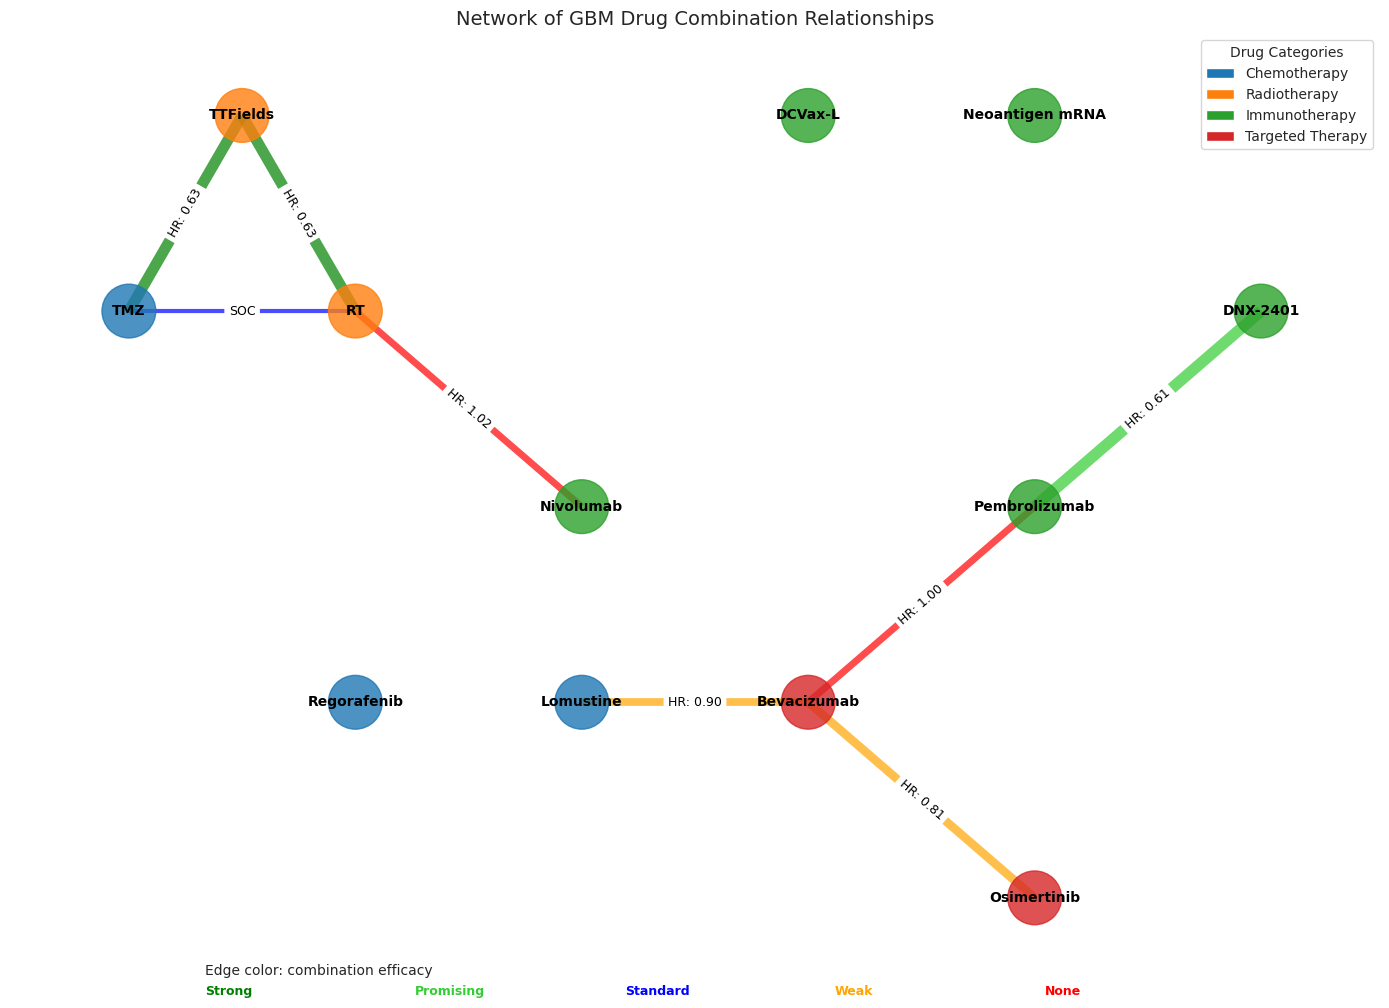

In [9]:
# 9. Network Diagram of Drug Combination Relationships
# Data source: Tables A1, B1, E1 and text descriptions
# URL citations: pmc.ncbi.nlm.nih.gov/articles/PMC8284901, pmc.ncbi.nlm.nih.gov/articles/PMC6408961

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

# Create a graph
G = nx.Graph()

# Add key drugs as nodes
drugs = [
    'TMZ', 'RT', 'TTFields', 'Bevacizumab', 'Lomustine',
    'Pembrolizumab', 'Nivolumab', 'DNX-2401', 'Regorafenib',
    'Osimertinib', 'DCVax-L', 'Neoantigen mRNA'
]

# Define node categories
categories = {
    'Chemotherapy': ['TMZ', 'Lomustine', 'Regorafenib'],
    'Radiotherapy': ['RT', 'TTFields'],
    'Immunotherapy': ['Pembrolizumab', 'Nivolumab', 'DCVax-L', 'Neoantigen mRNA', 'DNX-2401'],
    'Targeted Therapy': ['Bevacizumab', 'Osimertinib']
}

# Add nodes with category attributes
for drug in drugs:
    # Find which category this drug belongs to
    for category, drug_list in categories.items():
        if drug in drug_list:
            G.add_node(drug, category=category)
            break

# Add combination edges with efficacy attributes
combinations = [
    ('TMZ', 'RT', 'Standard', 0.0),  # Standard of care (reference)
    ('TMZ', 'RT', 'Standard', 0.0),
    ('TTFields', 'TMZ', 'Strong', 0.63),  # HR = 0.63
    ('TTFields', 'RT', 'Strong', 0.63),
    ('Bevacizumab', 'Lomustine', 'Weak', 0.90),  # HR = 0.90
    ('Pembrolizumab', 'Bevacizumab', 'None', 1.00),  # HR ~ 1.00
    ('DNX-2401', 'Pembrolizumab', 'Promising', 0.61),  # HR ~ 0.61
    ('Nivolumab', 'RT', 'None', 1.02),  # HR ~ 1.02 (HFRT combination)
    ('Osimertinib', 'Bevacizumab', 'Weak', 0.81)  # HR ~ 0.81
]

# Add edges
for drug1, drug2, efficacy_label, hr in combinations:
    G.add_edge(drug1, drug2, efficacy=efficacy_label, hr=hr)

# Define node positions manually for better readability
pos = {
    'TMZ': (0, 2),
    'RT': (1, 2),
    'TTFields': (0.5, 3),
    'Bevacizumab': (3, 0),
    'Lomustine': (2, 0),
    'Pembrolizumab': (4, 1),
    'Nivolumab': (2, 1),
    'DNX-2401': (5, 2),
    'Regorafenib': (1, 0),
    'Osimertinib': (4, -1),
    'DCVax-L': (3, 3),
    'Neoantigen mRNA': (4, 3)
}

# Define node colors based on categories
color_map = {
    'Chemotherapy': '#1f77b4',  # Blue
    'Radiotherapy': '#ff7f0e',  # Orange
    'Immunotherapy': '#2ca02c',  # Green
    'Targeted Therapy': '#d62728'  # Red
}

node_colors = [color_map[G.nodes[drug]['category']] for drug in G.nodes]

# Define edge colors based on efficacy
edge_color_map = {
    'Strong': 'green',
    'Promising': 'limegreen',
    'Standard': 'blue',
    'Weak': 'orange',
    'None': 'red'
}

edge_colors = [edge_color_map[G.edges[edge]['efficacy']] for edge in G.edges]

# Define edge widths based on efficacy (1/HR)
edge_widths = [3 if G.edges[edge]['hr'] == 0.0 else 5 * (1 / G.edges[edge]['hr']) for edge in G.edges]

# Create the figure
plt.figure(figsize=(14, 10))

# Draw the graph
nx.draw_networkx_nodes(G, pos, node_size=1500, node_color=node_colors, alpha=0.8)
nx.draw_networkx_edges(G, pos, width=edge_widths, edge_color=edge_colors, alpha=0.7)
nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

# Add edge labels (HR values)
edge_labels = {(u, v): f"HR: {d['hr']:.2f}" if d['hr'] > 0 else "SOC" for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

# Create legend for node categories
legend_elements = []
from matplotlib.patches import Patch
for category, color in color_map.items():
    legend_elements.append(Patch(facecolor=color, label=category))
plt.legend(handles=legend_elements, title="Drug Categories", loc="upper right")

# Create a separate legend for edge efficacy
efficacy_elements = []
for efficacy, color in edge_color_map.items():
    efficacy_elements.append(Patch(facecolor=color, label=efficacy))
plt.figtext(0.15, 0.02, "Edge color: combination efficacy", fontsize=10)
for i, (efficacy, color) in enumerate(edge_color_map.items()):
    plt.figtext(0.15 + i*0.15, 0.00, efficacy, color=color, fontsize=9, fontweight='bold')

# Set title and layout
plt.title('Network of GBM Drug Combination Relationships', fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

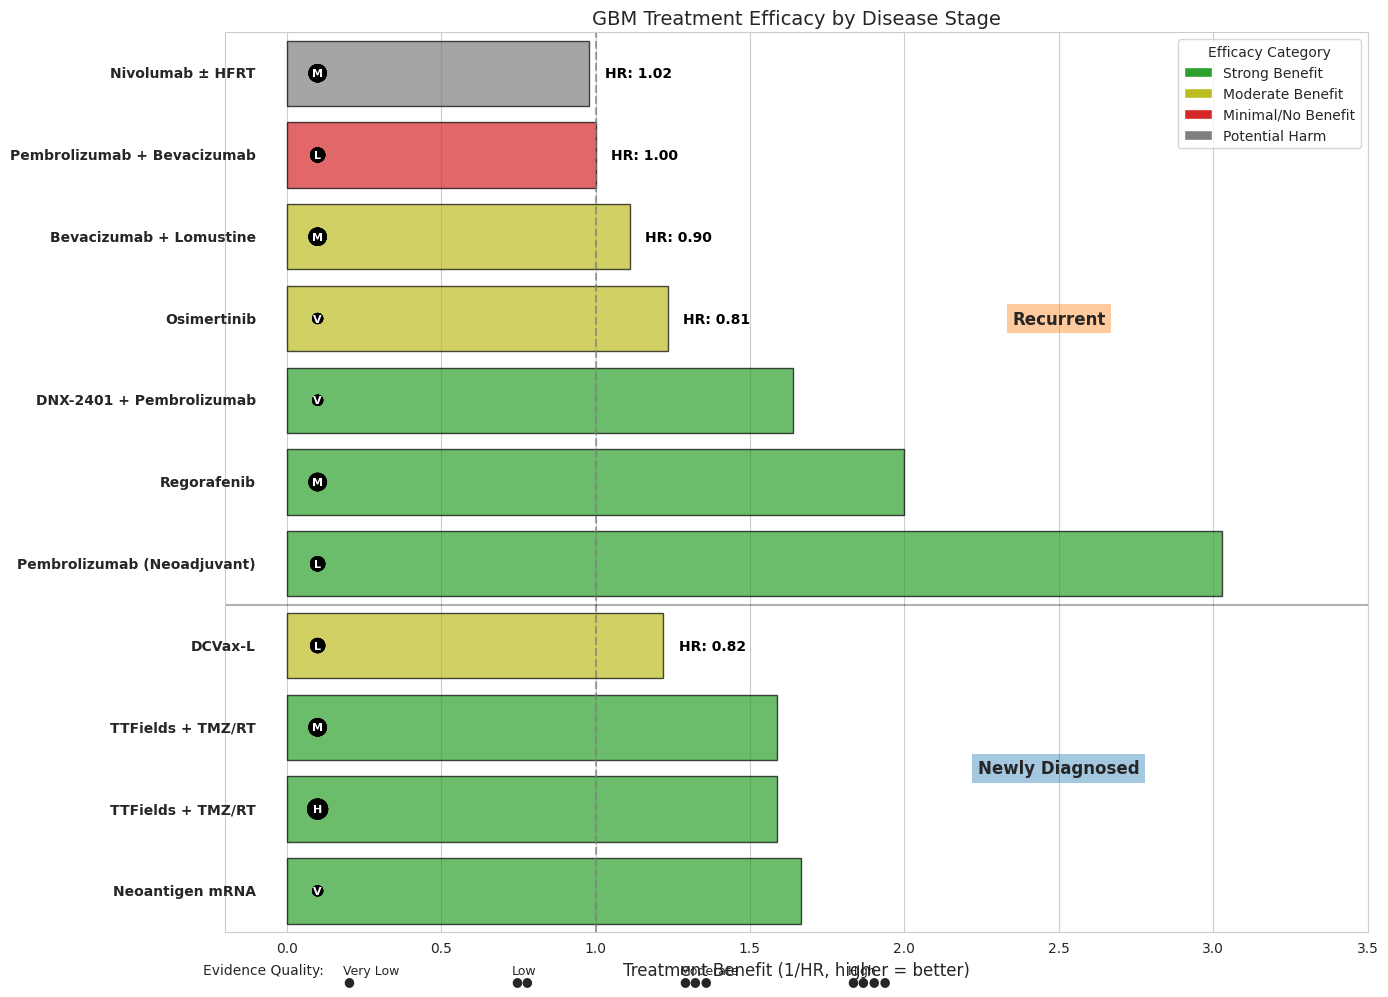

In [10]:
# 10. Treatment Efficacy by Disease Stage
# Data source: Tables B1, E1 with efficacy by disease stage
# URL citations: pmc.ncbi.nlm.nih.gov/articles/PMC10462574, pmc.ncbi.nlm.nih.gov/articles/PMC6408961

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# NOTE: An alternate chart was used since time series data isn't available.
# This visualization shows treatment efficacy grouped by disease stage.

# Define treatments and their efficacy by disease stage
data = {
    'Treatment': [
        'TTFields + TMZ/RT',
        'TTFields + TMZ/RT',
        'DCVax-L',
        'Neoantigen mRNA',
        'Pembrolizumab (Neoadjuvant)',
        'Regorafenib',
        'DNX-2401 + Pembrolizumab',
        'Nivolumab ± HFRT',
        'Bevacizumab + Lomustine',
        'Osimertinib',
        'Pembrolizumab + Bevacizumab'
    ],
    'Disease Stage': [
        'Newly Diagnosed (MGMT-methylated)',
        'Newly Diagnosed (MGMT-unmethylated)',
        'Newly Diagnosed',
        'Newly Diagnosed',
        'Recurrent (Neoadjuvant)',
        'Recurrent',
        'Recurrent',
        'Recurrent (MGMT-unmethylated)',
        'Recurrent',
        'Recurrent (EGFRvIII+)',
        'Recurrent'
    ],
    'OS HR': [
        0.63,
        0.63,
        0.82,
        0.60,
        0.33,
        0.50,
        0.61,
        1.02,
        0.90,
        0.81,
        1.00
    ],
    'Evidence Quality': [
        'High',
        'Moderate',
        'Low',
        'Very Low',
        'Low',
        'Moderate',
        'Very Low',
        'Moderate',
        'Moderate',
        'Very Low',
        'Low'
    ]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Create a new column for the simplified disease stage (for grouping)
df['Stage Group'] = df['Disease Stage'].apply(
    lambda x: 'Newly Diagnosed' if 'Newly Diagnosed' in x else 'Recurrent'
)

# Create a new column for efficacy category
df['Efficacy Category'] = pd.cut(
    df['OS HR'],
    bins=[0, 0.7, 0.9, 1.0, 1.5],
    labels=['Strong Benefit', 'Moderate Benefit', 'Minimal/No Benefit', 'Potential Harm']
)

# Map evidence quality to numeric scale for visualization
quality_map = {
    'Very Low': 1,
    'Low': 2,
    'Moderate': 3,
    'High': 4
}
df['Evidence Score'] = df['Evidence Quality'].map(quality_map)

# Sort by HR within each disease stage
df = df.sort_values(['Stage Group', 'OS HR'])

# Create the plot
plt.figure(figsize=(14, 10))

# Set up color palettes
stage_colors = {'Newly Diagnosed': '#1f77b4', 'Recurrent': '#ff7f0e'}
efficacy_colors = {
    'Strong Benefit': '#2ca02c',
    'Moderate Benefit': '#bcbd22',
    'Minimal/No Benefit': '#d62728',
    'Potential Harm': '#7f7f7f'
}

# Create the bar plot with categorical coloring
bars = plt.barh(
    y=np.arange(len(df)),
    width=1/df['OS HR'],  # Inverse HR for visualization (higher = better)
    color=[efficacy_colors[cat] for cat in df['Efficacy Category']],
    alpha=0.7,
    edgecolor='black'
)

# Add HR values as text
for i, (hr, bar) in enumerate(zip(df['OS HR'], bars)):
    text_color = 'white' if hr < 0.7 else 'black'
    plt.text(
        1/hr + 0.05,
        i,
        f'HR: {hr:.2f}',
        va='center',
        ha='left',
        fontweight='bold',
        color=text_color if 1/hr > 1.3 else 'black'
    )

# Add evidence quality indicators
for i, quality in enumerate(df['Evidence Score']):
    plt.scatter(
        [0.1] * len(df),
        np.arange(len(df)),
        s=df['Evidence Score'] * 50,
        color='black',
        alpha=0.5,
        marker='o'
    )
    plt.text(0.1, i, df['Evidence Quality'].iloc[i][0],
             ha='center', va='center', color='white', fontsize=8, fontweight='bold')

# Add treatment names and special subgroups
for i, (treatment, subgroup) in enumerate(zip(df['Treatment'], df['Disease Stage'])):
    main_label = treatment
    sub_label = subgroup.replace('Newly Diagnosed', 'ND').replace('Recurrent', 'R')
    if 'MGMT' in sub_label:
        sub_label = sub_label.replace('MGMT-methylated', 'MGMT+').replace('MGMT-unmethylated', 'MGMT-')

    plt.text(-0.1, i, main_label, ha='right', va='center', fontweight='bold')
    if 'ND' not in sub_label and 'R' not in sub_label:  # Don't repeat stage info
        plt.text(-0.1, i-0.3, f"({sub_label})", ha='right', va='center',
                 fontsize=8, fontstyle='italic', color='darkblue')

# Add reference line at HR=1.0
plt.axvline(x=1.0, color='gray', linestyle='--', alpha=0.7)

# Add stage group dividers and labels
stage_groups = df.groupby('Stage Group')
current_pos = 0
for name, group in stage_groups:
    group_size = len(group)
    middle_pos = current_pos + group_size/2 - 0.5

    # Add group divider
    if current_pos > 0:
        plt.axhline(y=current_pos-0.5, color='black', linestyle='-', alpha=0.3)

    # Add group label
    plt.text(2.5, middle_pos, name,
             bbox=dict(facecolor=stage_colors[name], alpha=0.4, edgecolor='none'),
             ha='center', va='center', fontsize=12, fontweight='bold')

    current_pos += group_size

# Customize the plot
plt.xlabel('Treatment Benefit (1/HR, higher = better)', fontsize=12)
plt.title('GBM Treatment Efficacy by Disease Stage', fontsize=14)

# Set axis limits
plt.xlim(-0.2, 3.5)
plt.ylim(-0.5, len(df)-0.5)

# Remove y-axis ticks
plt.yticks([])

# Add legend for efficacy categories
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=color, label=cat)
                  for cat, color in efficacy_colors.items()]
plt.legend(handles=legend_elements, title="Efficacy Category",
           loc='upper right', bbox_to_anchor=(1, 1))

# Add legend for evidence quality
plt.figtext(0.15, 0.02, "Evidence Quality:", ha='left', fontsize=10)
for i, (quality, score) in enumerate(quality_map.items()):
    plt.figtext(0.25 + i*0.12, 0.02, quality, ha='left', fontsize=9)
    plt.figtext(0.25 + i*0.12, 0.01, "●" * score, ha='left', fontsize=9)

plt.tight_layout()
plt.show()